## imports

In [49]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from astropy.io import fits

## load fits

In [51]:
image_name = "test.fits"

image_file = fits.open(image_name) # its an array of objects

## show object info

In [52]:
image_file.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4524, 3624)   float64   


## show headers

In [53]:
image_file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4524                                                  
NAXIS2  =                 3624                                                  
TESTING = 'first edition'                                                       
COMMENT this is avarage of 2 fits files                                         

## show image

C:\Users\ishay\AppData\Local\Temp/ipykernel_12380/913046456.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


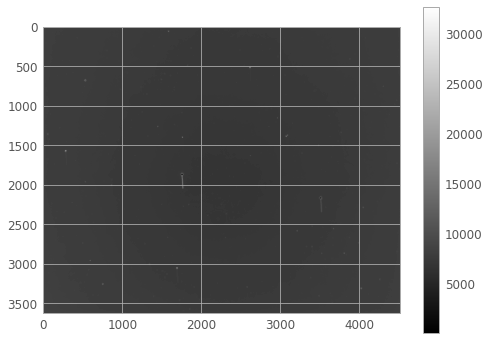

In [54]:
plt.figure()
plt.imshow(image_file[0].data, cmap='gray')
plt.colorbar()

## close file

In [55]:
image_file.close()

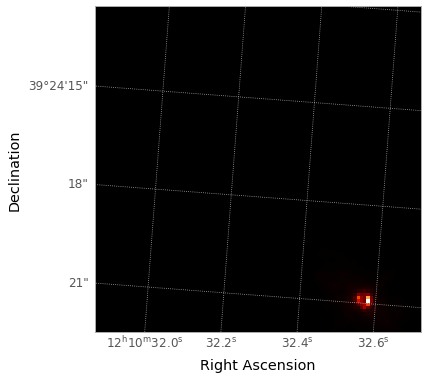

In [56]:
from astropy.wcs import WCS

# Open the FITS file and retrieve the data
# and WCS header keyword information from the
# first science extension. Save the WCS
# information into an Astropy WCS object.
with fits.open("data_test/test_photo.fits") as hdu:
    data = hdu[0].data
    wcs = WCS(hdu[0].header)
 
# Select a subsection of the image to display.
# Here we have selected a 400 x 400 pixel section
# with x = [280:680] and y = [2290:2690].
cutout = data[:, :]
 
# Create the plotting object with the WCS projection.
plt.subplot(projection=wcs)
plt.imshow(cutout)
plt.grid(color='white', ls=':', alpha=0.7)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
 
# Save the figure.
# plt.savefig('galaxies_wcs.png')